# Chapter 9: Multiclass Classification Algorithms

## Overview
In this chaper, you will learn how to identify and implement the algorithms that will help you solve multiclass classification problems in marketing analytics. You will be going through the different types of classifiers and implementing them using scikit-learn library in Python. Next, you eill learn to interpret the micro- and macro-performance of a classifier in multicall problems. Moreover, you will be learning about different sampling techniques to solve the problem of imbalanced data. By the end of this chapter, you will be able to apply different kinds of algorithms and evaluation metrics to solve multiclass classification problems. 

### Introduction 
A company wants to predict which seller a specific user would be more inclined to buy from. They'll then make the most preferred seller a part of their "Verified Seller" program. This will help the company increase the chances that the product will be bought by the user, leading to an increase in company profits. You cannot use the techniques learned previously to solve this question. 

### Understanding Multiclass Classification
multiclass classification problems can broadly be divided into the following three categories:
1) Multiclass Classification:
- involves classifying instances or samples into one class out of multiple classes.
- Each sample is assigned only one label and cannot be assigned more than one labeel at a time. 
- For Example, a product can only be bought from only one seller. 

2) Multilabel Classification:
- Each sample is assigned a set of target labels. 
- For Example, given some movie you want to advertise, there can bee multiple genres it can be categorized into - horror, comedy, thriller, and more. 

3) Multioutput Regression:
- Each sample is assigned several target variables with different properties.
- Given a specific product, you might be asked to predict the number of purchases, the enumber of returns, the percentage discount applied to each purchase, and more. 

## Clasifiers in Multiclass Classification
Let's consider two problem statements:
1) An online trading company wants to provide additional benefits to its customers. The Marketing Analytics team has divided the customers into 5 categories based on when the last time they logged in to the platform was. 

2) The same trading company wants to build a recommendation system for mutual funds. This will recommend their users a mutual fund based on the risk they are willing to take, the amount thay are planning to invest, and some other features. The number of mutual funds is well over 100. 

**Multiclass classification can be implemented by scikit-learn in the following two ways:**

1) **One-Versus-All (One-Versus-Rest) classifier:**
- One classifier is fit against one class. For each of the classifiers, the class is then fit against all the other classes, producing a real-valued decision confidence score, instead of class labels. From the decision confidence score, the maximum value is picked up to get the final class label.
- The advantage of one-versus-all is its interpretability and efficiency.

- from sklearn.linear_model import LogisticRegression
- from sklearn.multiclass import OneVsRestClassifier
- ovr = OneVsRestClassifier(LogisticRegression())
- ovr.fit(X_train, y_train)
- ovr.predict(X)

2) **One-Versus-One Classifier:**
- This constructs one classifier per pair of classes. The intuitive idea is to develop a binary classifier for each possiblee pair of classes, derive the decision boundry between these two classes, and build an ensemble.
- During prediction, the label is assigned by majority voting and in the event of a tie the class with the highest aggregate classification confidence is selected. 
- Majority voting, is the concept of taking the most frequent class output by each decision tree or each classifier. 

- from sklearn.linear_model import LogisticRegression
- from sklearn.multiclass import OneVsOneClassifier
- ovo = OneVsOneClassifier(LogisticRegression())
- ovo.fit(X_train, y_train)
- ovo.predict(X)


The problem statements both fall under the category of multiclass classification; however, there is a huge variation in the number of classes.
- 1) you will have 5 classes
- 2) you will have 100 classes
- if you were to train a separate classifier for each class (1-v-1), you would end up with arounf 5,000 classifiers. 
- 2) 4,950 classes

If you were to do One-Vs-All, you would end up with highly class-imbalanced data for each classifier, which would reduce performance. 

## Exercise 9.01: Implementing a Multiclass Classification Algorithm on a Dataset

The manager of the this store has reached out to you to help increase their sales by properly segmenting the customers into different categories, for example, loyal customers, potential customer, fence sitter, and more. The store will use this knowledge to give segment=specific discounts to their customers, which would help in inicreasing their sales and shifting more customers to the loyal customer category. 

Since there are more than two classes, the given problem falls under the category of multiclass classification. You will have access to the following features of the dataset:

- Frequency: The number of purchaases made by the customer
- Recency: How recently the customer bought from the online retailer (in days)
- MonetaryValue: The total amount spent by the customer between 2010 and 2011.
- Tenure: How long the customer has been associated with the retailer (in days)
- Segment: which segement the customer belongs to; that is, are they a loyal customer or a potential customer? With the help of segment details, marketing campaigns can be targeted effectively. 

In [4]:

import pandas as pd
import numpy as np
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.svm import LinearSVC

segmentation = pd.read_csv('Exercise9.01/Segmentation.csv')

In [5]:
# Putting feature variable to X
X = segmentation.drop(['CustomerID','Segment'],axis=1)

# Putting response variable to y
y = segmentation['Segment']

In [6]:
# Fit and predict one-vs-all classifier
OneVsRestClassifier(LinearSVC(random_state=0)).fit(X,y).predict(X)

/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True

array(['Fence Sitter', 'Potential', 'Fence Sitter', ..., 'Potential',
       'Potential', 'Potential'], dtype='<U12')

In [7]:
# Fit and predict one-vs-one classifier
OneVsOneClassifier(LinearSVC(random_state=0)).fit(X,y).predict(X)

/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/dom/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True

array(['Fence Sitter', 'Potential', 'Fence Sitter', ..., 'Potential',
       'Potential', 'Potential'], dtype=object)

### End Exercise 9.01


## Performance Metrics


In the case of a multiclass classification problem, you average out the metrics to find the micro-average or macro-average of precision, recall, and f1 score in a k-class system, where **k** is the number of classes. Averaging is useful in the case of multiclass classification since you have multiple class labels. This is because each classifier is going to give one class as the prediction; however, in the end, you are just looking for one class. in such cases, an aggregation such as averaging helps in getting the final output. 

- The macro-average computes the metrics such as precision, recall, or F1 score of each class independently and takes the average.
- The micro-average sums the contributions of all classes to compute the average. If you suspect the data to be not balanced, then use micro-average. Precision, recall, and F1 score is calculated by summing up the individual **True Positives, False Positives, and False Negatives**

- from sklearn.metrics import precision_recall_fscore_support
- precision_recall_fscore_support(y,y_pred,average='micro')
- precision_recall_fscore_support(y,y_pred, average='macro')

## Exercise 9.02: Evaluating Performance Using Multiclass Metrics


In [8]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_fscore_support

In [9]:
segmentation.head()

,CustomerID,Recency,Tenure,Frequency,MonetaryValue,Segment
0,12346,326,326,2,0.00,Fence Sitter
1,12349,19,19,73,1757.55,Potential
2,12350,310,310,17,334.40,Fence Sitter
3,12353,204,204,4,89.00,Fence Sitter
4,12354,232,232,58,1079.40,Fence Sitter


In [10]:
segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3046 entries, 0 to 3045
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     3046 non-null   int64  
 1   Recency        3046 non-null   int64  
 2   Tenure         3046 non-null   int64  
 3   Frequency      3046 non-null   int64  
 4   MonetaryValue  3046 non-null   float64
 5   Segment        3046 non-null   object 
dtypes: float64(1), int64(4), object(1)
memory usage: 142.9+ KB


In [11]:
segmentation['Segment'].value_counts()

Potential       1587
Fence Sitter    1030
Loyal            429
Name: Segment, dtype: int64

In [12]:
X = segmentation.drop(['CustomerID', 'Segment'], axis=1)

y = segmentation['Segment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=123, stratify=y)

In [13]:
model = DecisionTreeClassifier()

clf = model.fit(X_train, y_train)


In [14]:
y_pred = clf.predict(X_test)

In [15]:
precision_recall_fscore_support(y_test, y_pred, average='macro')
precision_recall_fscore_support(y_test, y_pred, average='micro')

(0.9967213114754099, 0.9967213114754099, 0.9967213114754099, None)

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

Fence Sitter       1.00      1.00      1.00       206
       Loyal       1.00      1.00      1.00        86
   Potential       1.00      1.00      1.00       318

    accuracy                           1.00       610
   macro avg       1.00      1.00      1.00       610
weighted avg       1.00      1.00      1.00       610



From the classification report, each class is equally weighted and similiar scores are produced when using micro-averaging. 

Macro-Averaging gives weightage to the most frequently used class labels, resulting in different scores. 

### End Exercise 9.02


## Exercise 9.03: Performing Classification On Imbalanced Data


In [17]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [18]:
data = pd.read_csv('Exercise9.03/adult.csv')

data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [19]:
data.replace('?', np.nan, inplace=True)

In [20]:
data.dropna(inplace=True)

In [21]:
data['income'].value_counts()

<=50K    34014
>50K     11208
Name: income, dtype: int64

In [22]:
# To perform classification, you need to convert the categorical values into numerical values. 
#You can use a label encoder for this conversion. 

from sklearn.preprocessing import LabelEncoder

Labelenc_workclass = LabelEncoder()
data['workclass'] = Labelenc_workclass.fit_transform(data['workclass'])

Labelenc_education = LabelEncoder()
data['education'] = Labelenc_education.fit_transform(data['education'])

Labelenc_marital_status = LabelEncoder()
data['marital-status'] = Labelenc_marital_status.fit_transform(data['marital-status'])

Labelenc_occupation = LabelEncoder()
data['occupation'] = Labelenc_occupation.fit_transform(data['occupation'])

Labelenc_relationship = LabelEncoder()
data['relationship'] = Labelenc_relationship.fit_transform(data['relationship'])

Labelenc_race = LabelEncoder()
data['race'] = Labelenc_race.fit_transform(data['race'])

Labelenc_gender = LabelEncoder()
data['gender'] = Labelenc_education.fit_transform(data['gender'])

Labelenc_native_country = LabelEncoder()
data['native-country'] = Labelenc_native_country.fit_transform(data['native-country'])

Labelenc_income = LabelEncoder()
data['income'] = Labelenc_income.fit_transform(data['income'])

In [23]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,4,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,2,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,2,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,2,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,4,7,1,4,1,0,0,30,38,0


In [24]:
X = data.drop(['income'], axis=1)

y = data['income']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2, random_state=123)

In [26]:
clf_random = RandomForestClassifier(random_state=0)
clf_random.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [27]:
y_pred = clf_random.predict(X_test)

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91      6808
           1       0.74      0.63      0.68      2237

    accuracy                           0.85      9045
   macro avg       0.81      0.78      0.79      9045
weighted avg       0.85      0.85      0.85      9045



The model was able to classify **Class 0** with 88% precision, **Class 1** with a precision of 74%.

Class 1 had a lower score in terms of both precision and recall. The dataset was highly imbalanced, and led to the poor performance of the model. 

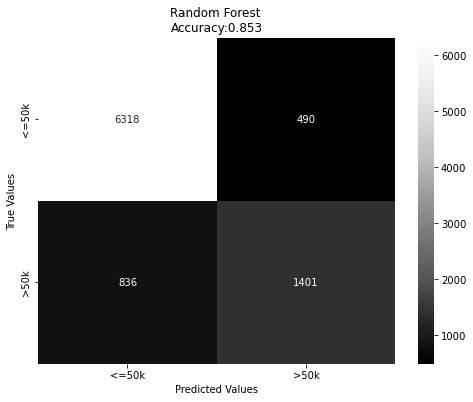

In [29]:
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index = ['<=50k', '>50k'],
                    columns =['<=50k', '>50k'] )
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'
         .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

The model classified 8336 people as earning less than or equal to 50,000; however, they were actually earning more then 50,000. The model classified 490 people as earning more than 50,000 when they were actually earning less than or equal to 50,000.

It is clear that imbalance influenced the machine learning model to be more biased toward the majority class. 

### End Exercise 9.03

## Dealing with Class Imbalanced Data

One way to deal with imbalanced dataset is to assign a penalty to every woring prediction on the minority class. 
- clf_random = RandomForestClassifier(n_estimators = 20, \
                                      max_depth=None,
                                      min_samples_split=7,
                                      random_state=0,
                                      class_weight='balanced')
                                      
**class_weight = 'balanced'** ensures that the penalty for each wrong prediction is adjusted based on the distribution of the class. 

Other strategies to deal with imbalanced data:
1) **Random Undersampling**: 
- The majority of class samples are randomly eliminated to maintain class balance.
- Advantages using this method is that it reduces the number of training samples, and training time. 
- Disadvantages may lead to underfitted models. 

2) **Random Oversampling**: 
- The minority class samples are replicated randomly to represent a higher representation of the minority class in the training sample. 
- Advantage: no information loss
- Disadvantage: may lead to overfitting data. 

3) **Synthetic Minority Oversampling Technique (SMOTE)**: 
- Mitigates problems faced in random oversampling. 
- A subset of the minority class data is taken, and a similiar replica of the data is created, which is added to the main dataset. 
- Advantage: reduces overfitting and not information loss
- Disadvantage: not effective for high-dimensional Data.



- import imblearn.over_sampling import SMOTE
- x_resampled, y_resampled = SMOTE().fit_resample(X_train,y_train)

## Exercise 9.04: Fixing the Imbalance of a Dataset Using SMOTE

In [30]:
import imblearn
from imblearn.over_sampling import SMOTE

In [31]:
X_resampled, y_resampled, = SMOTE().fit_resample(X_train,y_train)


In [34]:
clf_random.fit(X_resampled, y_resampled)


RandomForestClassifier(random_state=0)

In [35]:
y_pred = clf_random.predict(X_test)

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89      6808
           1       0.68      0.68      0.68      2237

    accuracy                           0.84      9045
   macro avg       0.79      0.79      0.79      9045
weighted avg       0.84      0.84      0.84      9045



There is a small drop in all the evaluation metrics compared to the previous exercise. This shows the models true performance. The same performance can now be expected if this model is used in a real-world scenerio. 

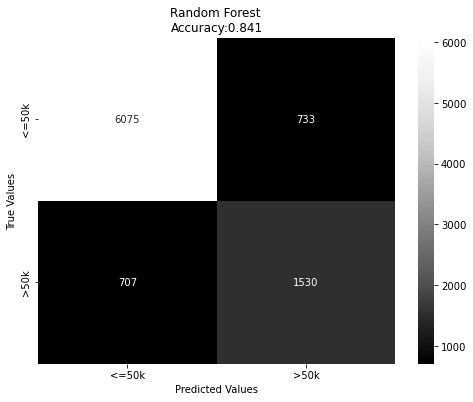

In [37]:
cm = confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(cm,
                    index = ['<=50k', '>50k'],
                    columns = ['<=50k', '>50k'])
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Greys_r')
plt.title('Random Forest \nAccuracy:{0:.3f}'
         .format(accuracy_score(y_test, y_pred)))
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

In the previous exercise the imbalanced daset modeled predicted 1401 people who were earning more then 50k. The SMOTE rebalanced model was able to predict 1530 people earning more than 50k . SMOTE technique improved model performance. 

### End Exercise 9.04